# Load

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5

C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5


In [4]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [5]:
'''od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')'''

"od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')"

In [6]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal','Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [7]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'


print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))

print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)

Number of classes: 2

DATASET AWAL 
Normal :  3500
TBC :  700


In [8]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


'C:\Users\ASUS' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [10]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [11]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


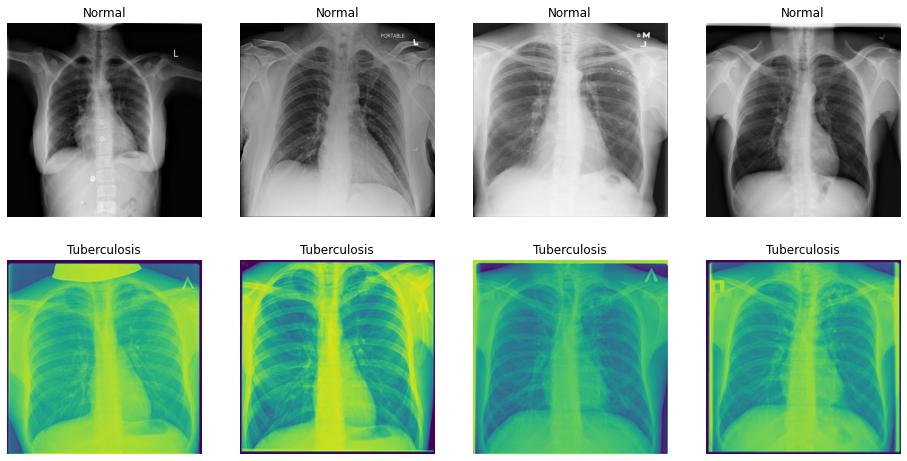

In [12]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 
#pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [13]:
!pip3 install keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import random

In [14]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/test"

In [15]:
height = 100
width = 100
batch_size = 32

# Preprocessing Khusus Noise

In [16]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #np.clip(img, 0., 255.)
    return img

In [17]:
#Testing Generator Both
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      preprocessing_function=add_noise,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


test_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')


Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


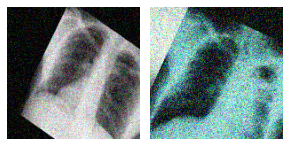

In [18]:
#tampilkan Data Generator Khusus add_noise
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
for i in range(2):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

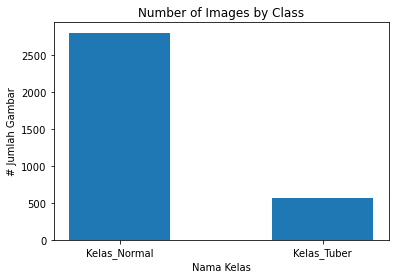

In [19]:
number_classes = {
'Kelas_Normal': len(os.listdir(train_normal_dir)),
'Kelas_Tuber': len(os.listdir(train_tuber_dir))}



plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Nama Kelas');
plt.ylabel('# Jumlah Gambar');

# Modelling

## Answer Model pertama menggabungkan minimal 2 kombinasi pretrained architecture

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam

In [21]:
baseModel_VGG16 = VGG16(input_shape = (150,150,3),
                           include_top = False,
                           weights = "imagenet")

baseModel_VGG19 = VGG19(input_shape = (150,150,3),
                           include_top = False,
                           weights = "imagenet")

for layer in baseModel_VGG16 .layers:
    layer._name = layer._name + str('_16')
    layer.trainable = False

for layer in baseModel_VGG19 .layers:
    layer._name = layer._name + str('_19')
    layer.trainable = False


"    \ninp = Input((150,150,3))\nvgg16_x = Flatten()(baseModel_VGG16 (inp))\nvgg19_x = Flatten()(baseModel_VGG19(inp))\nx = Concatenate()([vgg16_x, vgg19_x])\nx = Dropout(0.5)(x)\nx = Dense(1024,kernel_regularizer=regularizers.l2(0.00001), activation='relu')(x)\nout = Dense(2, activation='softmax')(x)\n"

In [36]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import  Input, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

input = Input((150, 150, 3))

vgg16_base_model = Flatten()(baseModel_VGG16 (input))
vgg19_base_model = Flatten()(baseModel_VGG19(input))

ensemble_model = Concatenate()([vgg16_base_model, vgg19_base_model])

output = Flatten()(ensemble_model)
output = Dense(256, activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.7)(output)
output = Dropout(0.6)(output)
output = Dense(128, activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.3)(output)
output = Dropout(0.2)(output)
output = Dense(2, activation='softmax')(output)

model = Model(input, output)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 4, 4, 512)    14714688    input_8[0][0]                    
__________________________________________________________________________________________________
vgg19 (Functional)              (None, 4, 4, 512)    20024384    input_8[0][0]                    
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 8192)         0           vgg16[4][0]                      
____________________________________________________________________________________________

In [40]:
model.compile(optimizer=Adam(lr=1e-3,decay=0.0001/16),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop_val_acc = EarlyStopping(monitor='val_acc',
                          patience=10,
                          verbose=1,
                          mode='max',
                          restore_best_weights=True
                          )

In [42]:
H = model.fit(train_generator,
              epochs=150,
              steps_per_epoch=10,  # images = batch_size * steps
              validation_data=validation_generator,
              callbacks=early_stop_val_acc 
             )

Epoch 1/150
10/10 [==============================] - 184s 20s/step - loss: 0.7926 - acc: 0.5792 - val_loss: 4.9610 - val_acc: 0.1667
Epoch 2/150
10/10 [==============================] - 200s 21s/step - loss: 0.9024 - acc: 0.6244 - val_loss: 5.1472 - val_acc: 0.1667
Epoch 3/150
10/10 [==============================] - 205s 22s/step - loss: 0.8464 - acc: 0.6754 - val_loss: 2.7137 - val_acc: 0.1690
Epoch 4/150
10/10 [==============================] - 193s 21s/step - loss: 0.6653 - acc: 0.7169 - val_loss: 1.8392 - val_acc: 0.2048
Epoch 5/150
10/10 [==============================] - 189s 20s/step - loss: 0.5997 - acc: 0.6903 - val_loss: 1.4796 - val_acc: 0.3571
Epoch 6/150
10/10 [==============================] - 190s 20s/step - loss: 0.7059 - acc: 0.6427 - val_loss: 1.4015 - val_acc: 0.3690
Epoch 7/150
10/10 [==============================] - 194s 21s/step - loss: 0.7198 - acc: 0.6779 - val_loss: 1.0579 - val_acc: 0.5071
Epoch 8/150
10/10 [==============================] - 196s 21s/step - 

# SavedModel

In [45]:
import json

save_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model'

json.dump(H.history, open(save_dir + '/V4_VGG16+VGG19.json', 'w'))

In [46]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
    
# Save the model.
save_tflite_dir = save_dir + '/V4_VGG16+VGG19.tflite'
with open(save_tflite_dir, 'wb') as f:
    f.write(tflite_model)

# Load TFLite

In [47]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=save_tflite_dir)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(np.argmax(output_data))
print(np.max(output_data))

0
0.7569846


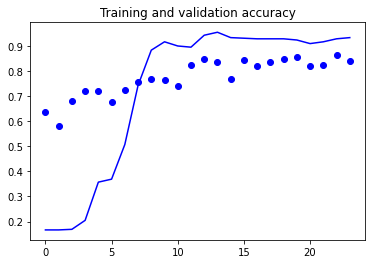

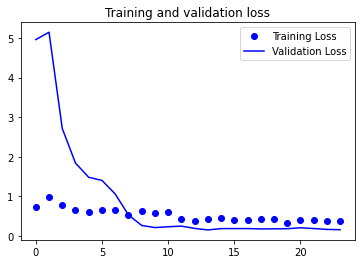

In [48]:
#Accuracy
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [49]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


In [50]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal       0.83      0.84      0.83       350
Tuberculosis       0.13      0.11      0.12        70

    accuracy                           0.72       420
   macro avg       0.48      0.48      0.48       420
weighted avg       0.71      0.72      0.72       420



In [52]:
test_datagen = ImageDataGenerator()

test_generator  = test_datagen.flow_from_directory(test_dir,
                                          class_mode=None,
                                          shuffle=False,
                                          target_size=(150, 150))

Found 420 images belonging to 2 classes.


In [53]:
from sklearn.metrics import classification_report

y_true = test_generator.classes

pred_result = model.predict(test_generator)
y_pred = np.argmax(pred_result, axis=-1)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.28      0.43       350
           1       0.21      0.96      0.34        70

    accuracy                           0.39       420
   macro avg       0.59      0.62      0.39       420
weighted avg       0.84      0.39      0.42       420



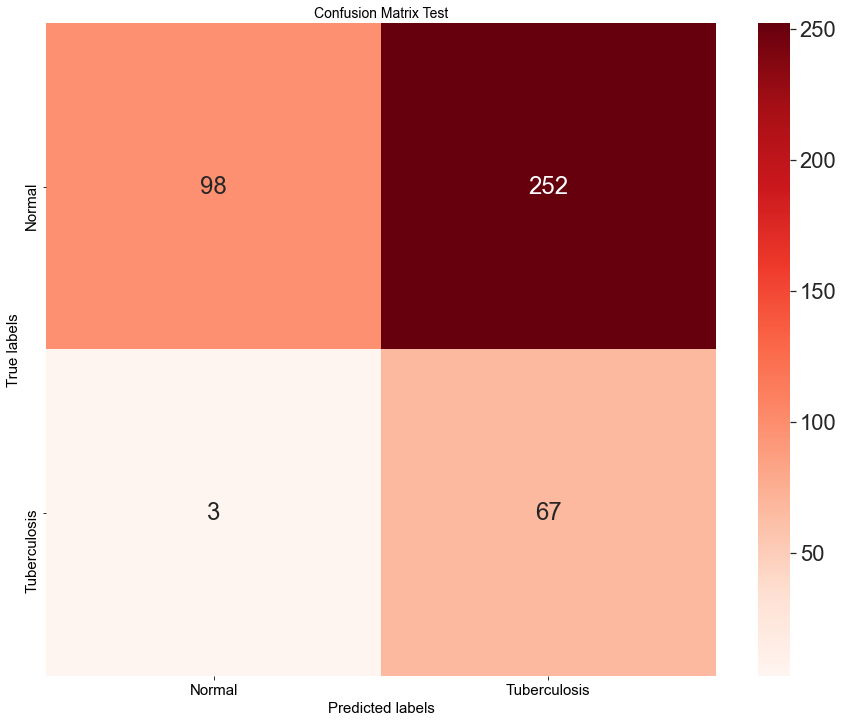

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

# Predict

In [71]:
import time
from tensorflow.keras.preprocessing.image import  load_img, img_to_array
def pred_img(img_path):
    img = load_img(img_path, target_size=(150,150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    start_pred_time = time.time()

    pred_result = model.predict(img)

    end_pred_time = time.time()

    pred_value = np.argmax(pred_result[0])
    # pred_label = list(label_dict.keys())[list(label_dict.values()).index(pred_value)]
    pred_label = 'Normal' if pred_value == 0 else 'Tuberculosis'
    confidence_percent = np.max(pred_result[0]) * 100
    pred_time = end_pred_time - start_pred_time

    return pred_label, confidence_percent, pred_time

In [72]:
#from random import shuffle
#test_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/test'
normal_files = os.listdir(test_normal_dir)
tuber_files = os.listdir(test_tuber_dir)

norm_name_dir = [os.path.join(test_normal_dir, fname) for fname in normal_files[:5]]
tuber_name_dir = [os.path.join(test_tuber_dir, fname) for fname in tuber_files[:5]]

norm_tuber_dir = norm_name_dir + tuber_name_dir

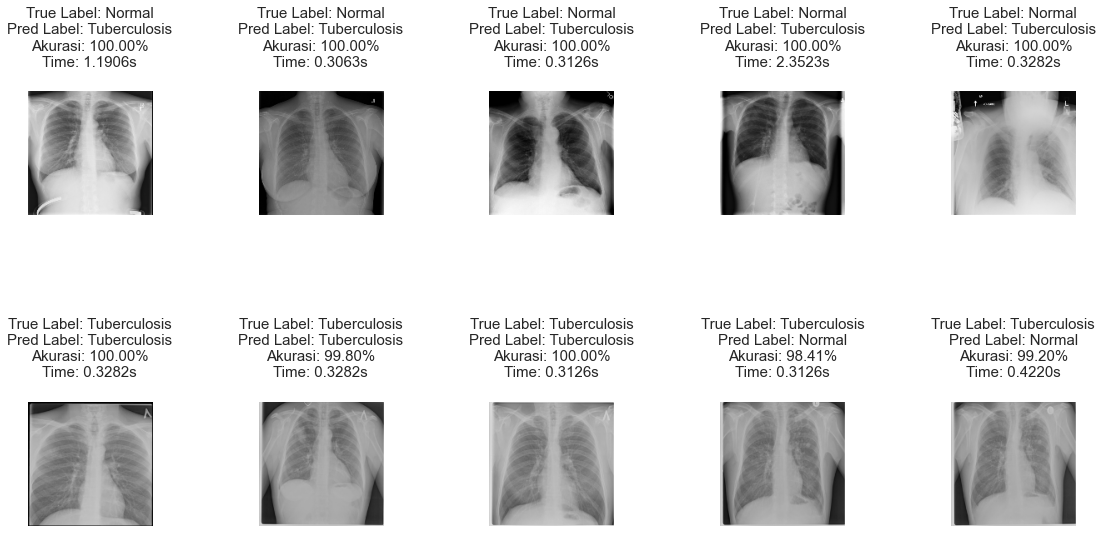

In [73]:
import matplotlib.pyplot as plt

nrows = 2
ncols = 5

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(norm_tuber_dir):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace=1.5)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (150,150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    true_label = img_path.split(os.path.sep)[-2]
    pred_result = pred_img(img_path)
    pred_label = pred_result[0]
    confidence_percent = pred_result[1]
    pred_time = pred_result[2]

    plt.title(f"True Label: {true_label}\nPred Label: {pred_label}\nAkurasi: {confidence_percent:.2f}%\nTime: {pred_time:.4f}s", y=1.15)
    plt.grid(False)
    plt.axis(False)
    plt.imshow(img)

plt.show()